Build the linear regression model using scikit learn in boston data to predict
'Price' based on other dependent variable.
Here is the code to load the data:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [5]:
import pickle
% matpllotlib inline

UsageError: Line magic function `%` not found.


In [6]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
bos.shape

(506, 13)

In [8]:
bos.columns


RangeIndex(start=0, stop=13, step=1)

In [9]:
data = pd.read_csv('boston.csv')

In [10]:
type(data)

pandas.core.frame.DataFrame

In [11]:
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [12]:
data.shape

(506, 15)

In [13]:
data.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [14]:
data.describe(include="all")

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
data.isna().sum() 

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

This shows there is no null value in data.

In [16]:
data= data.drop(columns = ['Unnamed: 0'])
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Dropped first column since it had no useful information
In Zn, chaos lot ot null values are seen.

In [17]:
data.zn.replace(0, np.nan, inplace=True)
data.chas.replace(0, np.nan, inplace=True)

In [18]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,NaN,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,NaN,7.07,NaN,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,NaN,7.07,NaN,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,NaN,2.18,NaN,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,NaN,2.18,NaN,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       134 non-null    float64
 2   indus    506 non-null    float64
 3   chas     35 non-null     float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


zn and chas sholl many null values.
Lets compute percentage for null data.

In [20]:
data.isnull().sum()/len(data)*100

crim        0.000000
zn         73.517787
indus       0.000000
chas       93.083004
nox         0.000000
rm          0.000000
age         0.000000
dis         0.000000
rad         0.000000
tax         0.000000
ptratio     0.000000
black       0.000000
lstat       0.000000
medv        0.000000
dtype: float64

In [21]:
data = data.drop("zn", 1)
data = data.drop("chas", 1)

dropped the columns zn and chas as these are with null values.

In [22]:
data.head()

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [23]:
data.isnull().sum()/len(data)*100

crim       0.0
indus      0.0
nox        0.0
rm         0.0
age        0.0
dis        0.0
rad        0.0
tax        0.0
ptratio    0.0
black      0.0
lstat      0.0
medv       0.0
dtype: float64

In [24]:
data.describe()

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [25]:
data.shape

(506, 12)

Lets plot histogram of 12 features.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000007B9CC08>,
      dtype=object)

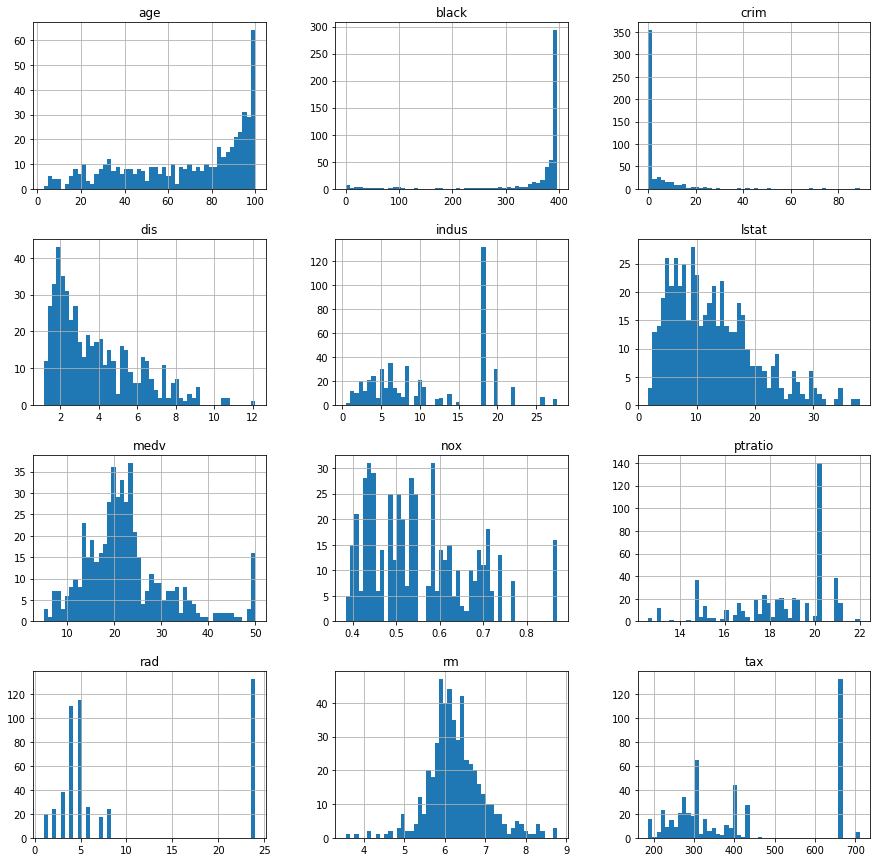

In [26]:
data.hist(bins=50, figsize=(15, 15))

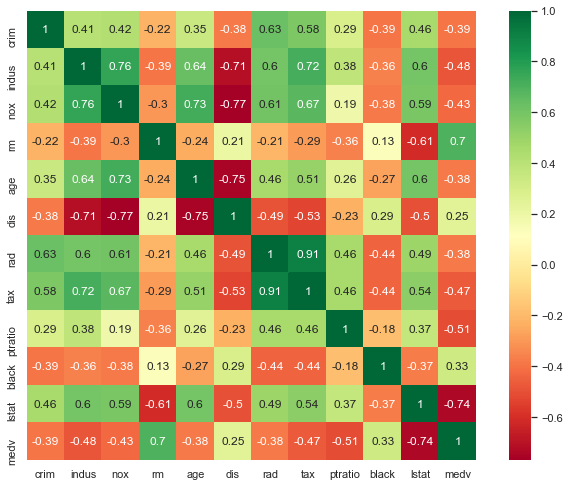

In [27]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data.corr().round(2), square=True, cmap='RdYlGn', annot=True)


RAD and TAX are strongly correlated=0.91
hence drop RAD

In [31]:
X = data.drop(["medv","rad"], 1).values
#X = data.drop(["medv"], 1).values
y= data["medv"].values

In [32]:
X


array([[6.3200e-03, 2.3100e+00, 5.3800e-01, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 7.0700e+00, 4.6900e-01, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 7.0700e+00, 4.6900e-01, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 1.1930e+01, 5.7300e-01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 1.1930e+01, 5.7300e-01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 1.1930e+01, 5.7300e-01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [33]:

from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [34]:
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]


In [35]:
vif

,VIF
0,1.657374
1,3.637005
2,4.282918
3,1.842969
4,3.037625
5,3.299787
6,3.225417
7,1.525241
8,1.338371
9,2.921362


None of the column value has VIF>10, hence v can proceed further.

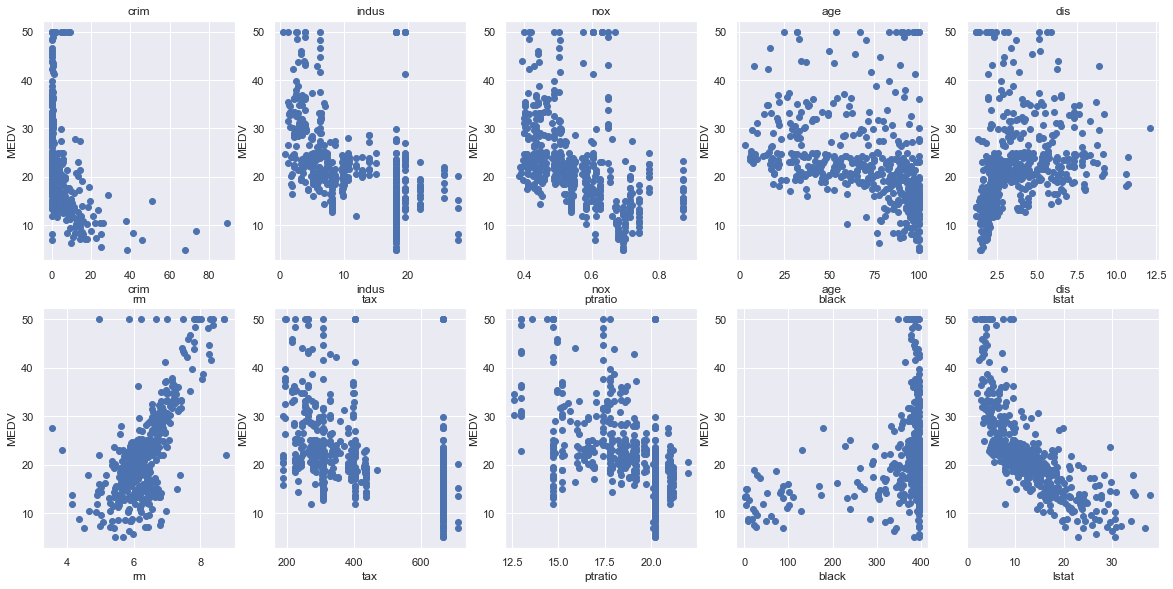

In [36]:
plt.figure(figsize=(20, 15))
features = ['crim','indus','nox','age','dis','rm','tax','ptratio','black','lstat']
target = data['medv']
for i, col in enumerate(features):
    plt.subplot(3, len(features)/2 , i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [37]:
print(X.shape)
print(y.shape)

(506, 10)
(506,)


In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.10,random_state=355)

In [39]:
y_train

7      27.1
26     16.6
88     23.6
283    50.0
387     7.4
       ... 
291    37.3
501    22.4
346    17.2
130    19.2
254    21.9
Name: medv, Length: 455, dtype: float64

In [40]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

regression.fit(x_train,y_train)

y_pred = regression.predict(x_test)
y_pred

array([16.73036756, 20.39477842, 31.61222952, 23.95404535,  5.38555376,
       23.98499021, 21.83179215, 19.17490246, 43.91339148, 19.89067162,
       25.63819016, 27.02141495, 27.06720928, 18.25814079,  9.71243075,
       32.88938443, 20.00179942, 19.64948799, 24.55784521, 16.59212089,
       20.42648071, 22.97968843, 32.69520707, 26.3641594 , 36.49639318,
       26.03103429, 29.08612594, 35.62172325, 22.17941875, 22.00375043,
       21.57136582, 25.7538153 , 15.3387574 , 18.70833531, 18.76684699,
       24.55491777, 32.66981944, 19.72677544, 29.21558507, 31.52306891,
       24.16225387, 16.14913249, 19.8595215 , 18.9803385 , 20.25363   ,
       20.82865129, 29.08645326, 17.15982784, 21.87650575, 18.00277509,
       18.2529418 ])

In [50]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("MSE",mean_squared_error(y_test, y_pred))
print("MAE",mean_absolute_error(y_test, y_pred))
print("R2",r2_score(y_test, y_pred))


MSE 8.585953019743894
MAE 2.3410141297186757
R2 0.8306604435819729


In [41]:
regression.score(x_train,y_train)    

0.7103619799499534

In [ ]:
mean_squared_error(x_train,y_train)

In [77]:
r2 = regression.score(x_test, y_test)
r2

0.830660443581973

In [76]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [78]:
adj_r2(x_train,y_train)

0.7038386011199974

In [53]:

adj_r2(x_test,y_test)

0.7883255544774662

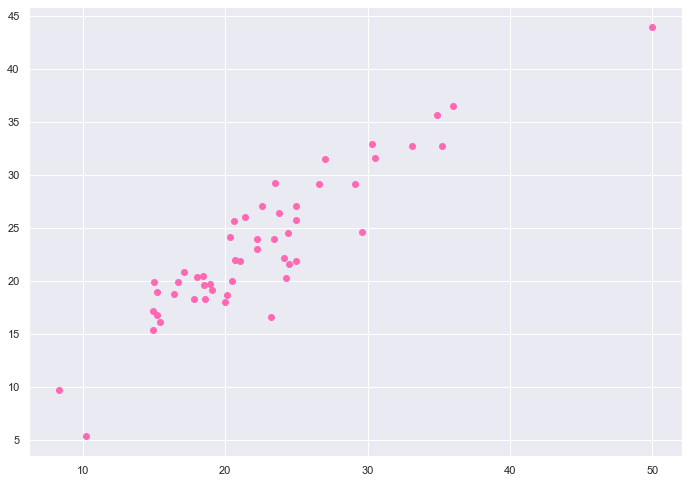

In [42]:
plt.scatter(y_test, y_pred,color='hotpink')
plt.show()


In [54]:
# saving the model to the local file system
filename = 'finalized_modelBoston.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [57]:
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [58]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.004292527690304485

In [60]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.004292527690304485, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [61]:
lasso_reg.score(x_test, y_test)

0.8308932347638442

In [62]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.94505702, 0.1203752 , 9.83874005, 8.54717111, 8.38416587,
       5.22722314, 9.25709863, 8.07243467, 8.1258146 , 7.69941789,
       3.41766427, 8.18474904, 6.38626044, 6.16863832, 2.15125417,
       0.17651636, 9.45745539, 0.55800905, 3.6829182 , 9.87432368,
       7.67836698, 0.84165821, 6.68041423, 7.41832272, 9.57826629,
       4.94859255, 1.78502999, 5.73198049, 7.05297083, 6.02130599,
       5.62362246, 7.93414087, 8.41589491, 2.76668605, 0.65652059,
       6.48695289, 1.07973883, 6.63254328, 6.63597295, 8.44290153,
       1.35265465, 9.69282687, 0.75588994, 9.68557861, 6.87345108,
       4.33002846, 6.86586357, 7.85263114, 7.6740272 , 8.69581648]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [63]:
ridgecv.alpha_

0.12037520123460377

In [64]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.12037520123460377, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [65]:
ridge_model.score(x_test, y_test)

0.8307386345333679

In [66]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [67]:
elasticCV.alpha_

0.09289949160200432

In [68]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [69]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.09289949160200432, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [70]:
elasticnet_reg.score(x_test, y_test)

0.8365923868383087

So, we can see by using different type of regularization, we still are getting the same r2 score. That means our OLS model has been well trained over the training data and there is no overfitting.